In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:54<00:00, 24.2MB/s]
100% 1.06G/1.06G [00:54<00:00, 20.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    )

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    )


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

We will now normalize the images, also change the dtype from tf.int32 to tf.float32

In [5]:
#Normalization

def process(image, label):

  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds.map(process)
validation_ds.map(process)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 93s 131ms/step - loss: 1.3133 - accuracy: 0.5890 - val_loss: 0.6275 - val_accuracy: 0.6588
Epoch 2/10
625/625 [==============================] - 80s 128ms/step - loss: 0.5792 - accuracy: 0.6974 - val_loss: 0.5610 - val_accuracy: 0.7164
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4889 - accuracy: 0.7635 - val_loss: 0.4768 - val_accuracy: 0.7732
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4394 - accuracy: 0.7963 - val_loss: 0.5624 - val_accuracy: 0.6880
Epoch 5/10
625/625 [==============================] - 74s 117ms/step - loss: 0.3655 - accuracy: 0.8382 - val_loss: 0.4638 - val_accuracy: 0.7880
Epoch 6/10
625/625 [==============================] - 78s 125ms/step - loss: 0.2821 - accuracy: 0.8761 - val_loss: 0.5883 - val_accuracy: 0.7746
Epoch 7/10
625/625 [==============================] - 71s 113ms/step - loss: 0.2117 - accuracy: 0.9130 - val_loss: 0.5408 - val_ac

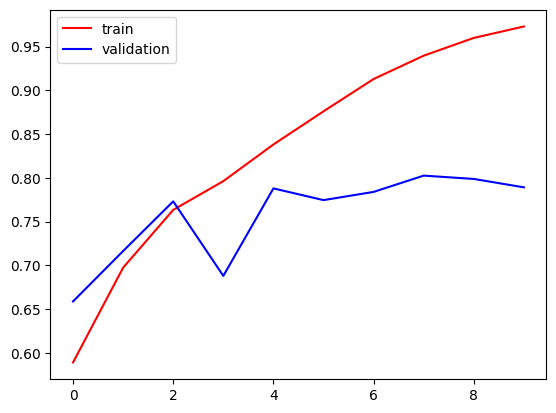

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

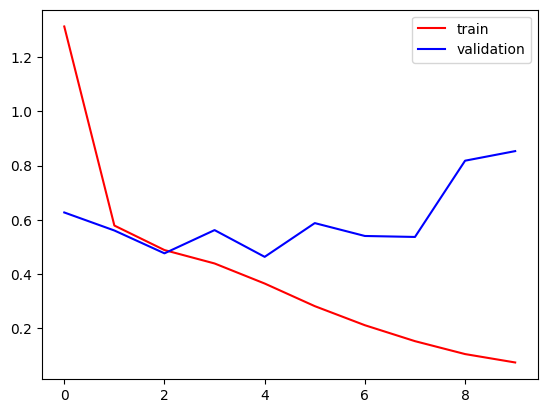

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

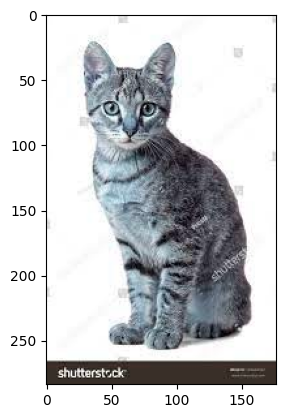

In [24]:
import cv2
test_img = cv2.imread('/content/cat2.jpg')
plt.imshow(test_img)

In [25]:
test_img = cv2.resize(test_img, (256, 256))
test_input= test_img.reshape(1,256,256,3)
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.23455256]], dtype=float32)

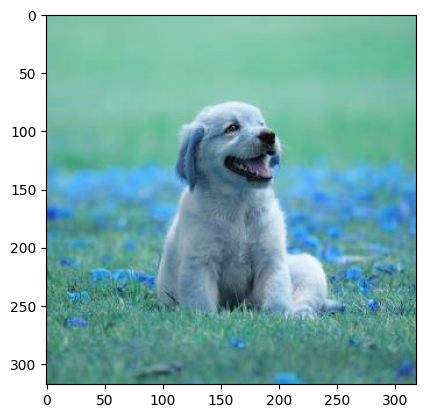

In [22]:
test_img2 = cv2.imread('/content/dog.jpg')
plt.imshow(test_img2)

In [23]:
test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape(1,256,256,3)
model.predict(test_input2)

1/1 [==============================] - 0s 31ms/step


array([[0.9990803]], dtype=float32)